In [15]:
from PolynomialRegressionModel import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from NN import NeuralNetModel
import json


In [16]:
# df = pd.read_csv('Confirmed_Cases_US.csv')
# df

In [17]:
# x = df.iloc[:,:-1]
# y = df.iloc[:,-1]
# y

In [18]:
with open("config.json", "r") as f:
    config = json.load(f)

In [19]:
model_config = config["models"]
model_config

{'enabled': True,
 'model_name': 'Cases',
 'model': {'type': 'neural_net',
  'alpha': 1e-06,
  'hidden_layer_sizes': 'auto',
  'learning_rate_init': 0.0008,
  'max_iter': 50000,
  'batch_size': 32,
  'tol': 1e-06,
  'n_iter_no_change': 250,
  'verbose': False},
 'datagrabber_class': 'CasesDataGrabber',
 'grab_data_from_server': True,
 'offline_dataset_date': '2020-09-26',
 'days_to_predict': 10}

In [20]:
df_vac = pd.read_csv('Confirmed_VS_Vaccinated_US.csv').drop(columns=['Unnamed: 0'])
df_vac

,ObservationDate,Confirmed,People_Fully_Vaccinated
0,2020-12-20,76818746.0,0.0
1,2020-12-21,77367360.0,0.0
2,2020-12-22,78016498.0,0.0
3,2020-12-23,78710560.0,0.0
4,2020-12-24,79377452.0,0.0
...,...,...,...
65,2021-02-23,112019890.0,41842414.0
66,2021-02-24,112464430.0,42359354.0
67,2021-02-25,112911535.0,43514673.0
68,2021-02-26,113325717.0,45521878.0


In [21]:
x = np.array(df_vac.index.values.tolist()).reshape(-1, 1)
list = []
for i in range(1,22):
    list.append(69 +i)
x_pred = np.array(list).reshape(-1, 1)
x_pred

array([[70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],
       [77],
       [78],
       [79],
       [80],
       [81],
       [82],
       [83],
       [84],
       [85],
       [86],
       [87],
       [88],
       [89],
       [90]])

In [22]:
y_c_train = df_vac.iloc[:,1]
y_v_train = df_vac.iloc[:,-1]
y_v_train

0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
         ...    
65    41842414.0
66    42359354.0
67    43514673.0
68    45521878.0
69    46345540.0
Name: People_Fully_Vaccinated, Length: 70, dtype: float64

In [23]:
# model_v = PolynomialRegressionModel(polynomial_degree=2)
# model_v.train(x,y_v_train)

In [30]:
neural_net_model = NeuralNetModel(model_config["model_name"])
neural_net_model.train(x, y_v_train, model_config["model"])

E:\python_pj\venv38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [32]:
beginning_day=len(x)
limit=10
next_days_x = np.array(range(beginning_day, beginning_day + limit)).reshape(-1, 1)
y_v_pred = neural_net_model.get_predictions(next_days_x)

In [33]:
y_v_pred

array([36397830, 37055633, 37713436, 38371240, 39029043, 39686847,
       40344650, 41002453, 41660257, 42318060])

In [34]:
df_y = pd.read_csv('02_28_to_03_20_vaccination.csv')
y_v_test = df_y.iloc[:,-1]
y_v_test

0     50217092.0
1     52969506.0
2     52933742.0
3     56283119.0
4     57540294.0
5     58534730.0
6     58056286.0
7     60088698.0
8     63270356.0
9     64762432.0
10    69592914.0
11    73010600.0
12    75600854.0
13    78513026.0
14    77982576.0
15    82336622.0
16    79035899.0
17    90713305.0
18    88548724.0
19    90448901.0
20    81404397.0
Name: People_Fully_Vaccinated, dtype: float64

In [35]:
import matplotlib.pyplot as plt

ValueError: x and y must have same first dimension, but have shapes (21, 1) and (10,)

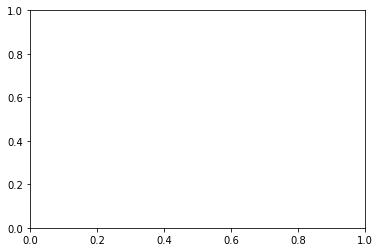

In [36]:
plt.plot(x_pred, y_v_pred, color='r', label="predicted vaccination")
plt.plot(x_pred,y_v_test,color='b', label="predicted confirmed cases")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Cases/Vacciantions")
plt.show()